In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Desktop/data/tested.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [3]:
df['Embarked'].value_counts()

S    270
C    102
Q     46
Name: Embarked, dtype: int64

In [4]:
df.isnull().value_counts()

PassengerId  Survived  Pclass  Name   Sex    Age    SibSp  Parch  Ticket  Fare   Cabin  Embarked
False        False     False   False  False  False  False  False  False   False  True   False       244
                                                                                 False  False        87
                                             True   False  False  False   False  True   False        82
                                                                                 False  False         4
                                             False  False  False  False   True   True   False         1
dtype: int64

In [5]:
df.shape

(418, 12)

In [6]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
df.duplicated().value_counts()

False    418
dtype: int64

<Axes: xlabel='Sex', ylabel='count'>

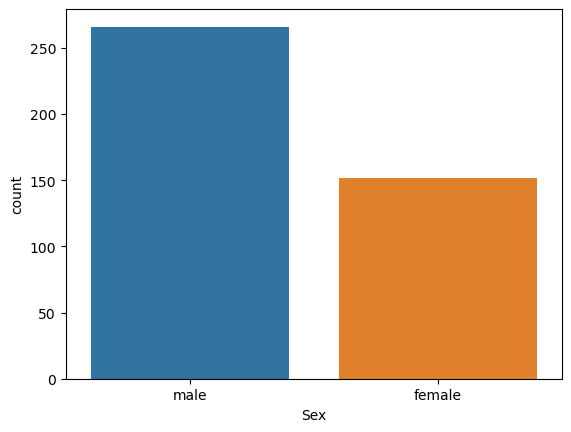

In [8]:
sns.countplot(data=df, x ='Sex')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [10]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [11]:
df1 =df[['Survived', 'Pclass', 'Age', 'SibSp',
       'Parch','Fare', 'Embarked']]

In [12]:
df1['Age'] = df1['Age'].replace(np.nan, df1['Age'].mean())
df1['Fare'] = df1['Fare'].replace(np.nan, df1['Fare'].mean())

C:\Users\santosh\AppData\Local\Temp\ipykernel_17720\233250245.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Age'] = df1['Age'].replace(np.nan, df1['Age'].mean())
C:\Users\santosh\AppData\Local\Temp\ipykernel_17720\233250245.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Fare'] = df1['Fare'].replace(np.nan, df1['Fare'].mean())


In [13]:
X=df1.drop("Survived",axis=1)
y=df1["Survived"]

In [14]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=100)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(292, 6) (292,)
(126, 6) (126,)


In [15]:
X_train_cat =X_train.select_dtypes(include =['object'])
X_train_num =X_train.select_dtypes(include =['int64','float64'])

In [16]:
X_train_cat.head()

,Embarked
150,C
80,C
346,S
377,S
272,C


In [17]:
X_train_num.head()

,Pclass,Age,SibSp,Parch,Fare
150,1,23.0,0,1,83.1583
80,3,6.0,1,1,15.2458
346,2,26.0,0,0,13.0000
377,2,21.0,0,0,11.5000
272,1,26.0,1,0,136.7792


In [18]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()


X_train_num_tran = pd.DataFrame(scaler.fit_transform(X_train_num),
                                 columns = scaler.get_feature_names_out(),
                                 index =X_train_num.index)

X_train_num_tran.head()

,Pclass,Age,SibSp,Parch,Fare
150,-1.485321,-0.562809,-0.476787,0.666327,0.804982
80,0.871819,-1.899765,0.562181,0.666327,-0.370638
346,-0.306751,-0.326876,-0.476787,-0.396884,-0.409515
377,-0.306751,-0.720098,-0.476787,-0.396884,-0.435481
272,-1.485321,-0.326876,0.562181,-0.396884,1.733204


In [30]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(drop ='first',sparse_output=False)

X_train_cat_tran = pd.DataFrame(encoder.fit_transform(X_train_cat),
                               columns = encoder.get_feature_names_out(),
                               index = X_train_cat.index)

X_train_cat_tran.head()

,Embarked_Q,Embarked_S
150,0.0,0.0
80,0.0,0.0
346,0.0,1.0
377,0.0,1.0
272,0.0,0.0


In [31]:
encoder.feature_names_in_

array(['Embarked'], dtype=object)

## feature encoding- label encoding 

In [32]:
X_train_cat_tran = pd.DataFrame(index = X_train_cat.index)

X_train_cat_tran.head()

""
150
80
346
377
272


In [33]:
embark_encoder ={'Q': 3,'C':2,'S':1}

X_train_cat_tran['Embarked']=X_train_cat['Embarked'].map(embark_encoder)

X_train_cat_tran.head()

,Embarked
150,2
80,2
346,1
377,1
272,2


In [34]:
X_train_transformed = pd.concat([X_train_num_tran,X_train_cat_tran],axis=1)

X_train_transformed.head()

,Pclass,Age,SibSp,Parch,Fare,Embarked
150,-1.485321,-0.562809,-0.476787,0.666327,0.804982,2
80,0.871819,-1.899765,0.562181,0.666327,-0.370638,2
346,-0.306751,-0.326876,-0.476787,-0.396884,-0.409515,1
377,-0.306751,-0.720098,-0.476787,-0.396884,-0.435481,1
272,-1.485321,-0.326876,0.562181,-0.396884,1.733204,2


In [35]:
X_test_cat =X_test.select_dtypes(include =['object'])
X_test_num =X_test.select_dtypes(include =['int64','float64'])


In [36]:
X_test_num_tran = pd.DataFrame(scaler.transform(X_test_num),
                                 columns = scaler.get_feature_names_out(),
                                 index =X_test_num.index)

X_test_num_tran.head()

,Pclass,Age,SibSp,Parch,Fare
98,0.871819,-0.798743,-0.476787,-0.396884,-0.498592
197,0.871819,-0.956032,-0.476787,-0.396884,-0.499963
369,-0.306751,-0.090943,-0.476787,-0.396884,-0.394657
201,0.871819,-2.345679,-0.476787,1.729538,-0.385279
129,0.871819,-0.484165,-0.476787,-0.396884,-0.495203


In [37]:
X_test_cat_tran =pd.DataFrame(index = X_test_cat.index)


X_test_cat_tran['Embarked']=X_test_cat['Embarked'].map(embark_encoder)


X_test_cat_tran.head()

,Embarked
98,1
197,1
369,2
201,1
129,1


In [38]:
X_test_tran =pd.concat([X_test_num_tran,X_test_cat_tran],axis=1)

X_test_tran.head()

,Pclass,Age,SibSp,Parch,Fare,Embarked
98,0.871819,-0.798743,-0.476787,-0.396884,-0.498592,1
197,0.871819,-0.956032,-0.476787,-0.396884,-0.499963,1
369,-0.306751,-0.090943,-0.476787,-0.396884,-0.394657,2
201,0.871819,-2.345679,-0.476787,1.729538,-0.385279,1
129,0.871819,-0.484165,-0.476787,-0.396884,-0.495203,1


In [53]:
%%time
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(X_train_transformed, y_train)

CPU times: total: 15.6 ms
Wall time: 3.88 ms


DecisionTreeClassifier()

In [54]:
y_pred_dt=dt.predict(X_test_tran)
y_pred_dt

array([0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0], dtype=int64)

In [55]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score, recall_score,classification_report

In [56]:
accuracy_score(y_test,y_pred_dt)

0.5476190476190477